In [19]:
from bs4 import BeautifulSoup
import requests

url = "https://medium.com/tag/health/archive"

html_text = requests.get(url).text

soup = BeautifulSoup(html_text, 'html.parser')

main_div = soup.find_all("div", {"role": "link"})

div = soup.find_all("div", {"data-href": True})

print(len(div))

for article in div:
    print(article['data-href'])





# for art in main_div:
#     print(art)
# #     print(div.data['href'])

# print(main_div)
# print(len(main_div))

# all_images = soup.find_all('img')

# print(len(all_images))

# print(all_images)

# print(soup.prettify())

10
https://medium.com/@hlofinding/natural-pain-relief-redefined-meridians-elite-acupressure-set-280710765e17
https://medium.com/@shance001/bdhshssh-02acddaf54a1
https://medium.com/@romeshg5/discover-the-secrets-to-healthy-nutrition-3cf8039d2f74
https://medium.com/@nazish2019/can-probiotics-soothe-inflammatory-bowel-disease-9ab76bd00b3d
https://medium.com/@mr6215458/sure-heres-an-article-approximately-apples-as-meals-58c5a3873c3f
https://medium.com/@bopapejmc/a-breath-of-fresh-air-cb1f92cd3b50
https://medium.com/illumination/running-thoughts-the-art-of-showing-up-for-a-run-52ff1667feda
https://medium.com/@tubaishtiaq/foods-and-habits-to-treat-anemia-at-home-d25f694329c2
https://medium.com/@nabeelahmad1070/constipation-mother-of-illnesses-enemy-of-health-ff0d5716915e
https://medium.com/@zaranoor1/how-to-gain-weight-in-a-healthy-way-1a642d1a75a1


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import requests

In [21]:
driver = webdriver.Chrome() 
driver.get("https://medium.com/tag/health/archive")


scroll_pause_time = 2  
article_links = set()

final_links = []

while len(final_links) < 3:
    # url = "https://medium.com/tag/health/archive"

    # html_text = requests.get(url).text

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # main_div = soup.find_all("div", {"role": "link"})

    div = soup.find_all("div", {"data-href": True})

    # print(len(div))

    for article in div:
        # print(article['data-href'])
        article_links.add(article['data-href'])
        final_links.append(article['data-href'])
        
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(scroll_pause_time)
    
    if len(final_links) > 3:
        break
    

driver.quit()

all_articles = []

for link in final_links:
    html_text = requests.get(link).text
    soup = BeautifulSoup(html_text, 'html.parser')
    current_article = {}
    
    all_paragraphs = soup.find_all('p')
    for i in range(len(all_paragraphs)):
        all_paragraphs[i] = all_paragraphs[i].get_text(strip=True)
    final_para = ' '.join(all_paragraphs)
    article_title = soup.find('title').get_text(strip=True) if soup.find('title') else "No Title"
    para_text = soup.get_text(separator=' ', strip=True)
    # current_article = ' '.join([par.text for par in all_paragraphs])
    
    current_article['Title'] = article_title
    current_article['Text'] = final_para
    
    # current_article = "Title : " + article_title + '\n' + current_article
    all_articles.append(current_article)
    print(current_article)
    # with open ('articles.txt', 'a') as f:
    #     f.write(current_article)
    #     f.write('\n')
    # print(current_article)
    
    
    # all_uls = soup.find_all('ul')
    
    
    
    

{'Title': 'Unlock the Secrets to a Healthier Body | by Romeshg | Jan, 2025 | Medium', 'Text': "Sign up Sign in Sign up Sign in Member-only story Romeshg Follow -- Share Unlock the Secrets to a Healthier Body Welcome to our guide on achieving a healthier body and mind. A healthier body is key to overall\xa0wellness. We'll explore\xa0nutrition,\xa0exercise, and\xa0sleep\xa0to help you unlock the secrets. Our goal is to offer a holistic approach to\xa0wellness. We focus on a healthy body and\xa0wellness. We'll dive into the key components of a healthy lifestyle, including the importance of wellness and its impact on our health. Understanding wellness and its impact on our health is the first step. A healthier body is not just about physical health. It's also about mental wellness and overall wellness. Introduction to Wellness Wellness is a crucial part of our lives. It plays a significant role in maintaining a healthy body. By focusing on wellness, we can improve our overall health and ac

Task 2: Data Cleaning and Preprocessing

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [37]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SAKSHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAKSHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAKSHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stopwords = set(stopwords.words('english'))
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [10]:
import re

In [30]:
for article in all_articles:
    text = article['Text']
    text_list = text.split()
    
    for i in range(len(text_list) - 1):
        if text_list[i] == 'Share':
            # print(i)
            text_list = text_list[i+1:]
            break
    
    # print(len(text_list))
    text = ' '.join(text_list)
    article['Text'] = text
    print(text) 

Unlock the Secrets to a Healthier Body Welcome to our guide on achieving a healthier body and mind. A healthier body is key to overall wellness. We'll explore nutrition, exercise, and sleep to help you unlock the secrets. Our goal is to offer a holistic approach to wellness. We focus on a healthy body and wellness. We'll dive into the key components of a healthy lifestyle, including the importance of wellness and its impact on our health. Understanding wellness and its impact on our health is the first step. A healthier body is not just about physical health. It's also about mental wellness and overall wellness. Introduction to Wellness Wellness is a crucial part of our lives. It plays a significant role in maintaining a healthy body. By focusing on wellness, we can improve our overall health and achieve a healthier body and mind. Key Takeaways Wellness is essential for a healthier body and mind A healthy body is the key to overall wellness Nutrition, exercise, and sleep are crucial co

In [31]:

text = re.sub(r'[^a-zA-Z\s]', '', all_articles[0]['Text']) # Removed the special characters

In [32]:
text = re.sub(r'https?:\/\/.*[\r\n]*', '', text) # Removed the URLs

text = re.sub(r'\d+', '', text) # Removed the digits

text = text.lower()



In [34]:
print(text)

# text = text.replace('sign up', '')
# text = text.replace('sign in', '')
# text = text.replace('medium open in app sign up sign in write sign up sign in', '')
text = re.sub(r'\s+', ' ', text).strip()
print(text)
with open('article.txt', 'w') as f:
    f.write(text)

unlock the secrets to a healthier body welcome to our guide on achieving a healthier body and mind a healthier body is key to overall wellness well explore nutrition exercise and sleep to help you unlock the secrets our goal is to offer a holistic approach to wellness we focus on a healthy body and wellness well dive into the key components of a healthy lifestyle including the importance of wellness and its impact on our health understanding wellness and its impact on our health is the first step a healthier body is not just about physical health its also about mental wellness and overall wellness introduction to wellness wellness is a crucial part of our lives it plays a significant role in maintaining a healthy body by focusing on wellness we can improve our overall health and achieve a healthier body and mind key takeaways wellness is essential for a healthier body and mind a healthy body is the key to overall wellness nutrition exercise and sleep are crucial components of wellness 

In [38]:
stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [39]:
sentences = sent_tokenize(text)

words = word_tokenize(text)


In [41]:
print(words)

['unlock', 'the', 'secrets', 'to', 'a', 'healthier', 'body', 'welcome', 'to', 'our', 'guide', 'on', 'achieving', 'a', 'healthier', 'body', 'and', 'mind', 'a', 'healthier', 'body', 'is', 'key', 'to', 'overall', 'wellness', 'well', 'explore', 'nutrition', 'exercise', 'and', 'sleep', 'to', 'help', 'you', 'unlock', 'the', 'secrets', 'our', 'goal', 'is', 'to', 'offer', 'a', 'holistic', 'approach', 'to', 'wellness', 'we', 'focus', 'on', 'a', 'healthy', 'body', 'and', 'wellness', 'well', 'dive', 'into', 'the', 'key', 'components', 'of', 'a', 'healthy', 'lifestyle', 'including', 'the', 'importance', 'of', 'wellness', 'and', 'its', 'impact', 'on', 'our', 'health', 'understanding', 'wellness', 'and', 'its', 'impact', 'on', 'our', 'health', 'is', 'the', 'first', 'step', 'a', 'healthier', 'body', 'is', 'not', 'just', 'about', 'physical', 'health', 'its', 'also', 'about', 'mental', 'wellness', 'and', 'overall', 'wellness', 'introduction', 'to', 'wellness', 'wellness', 'is', 'a', 'crucial', 'part', 

In [42]:
filtered_tokens = [word for word in words if word not in stopwords]
print(filtered_tokens)

['unlock', 'secrets', 'healthier', 'body', 'welcome', 'guide', 'achieving', 'healthier', 'body', 'mind', 'healthier', 'body', 'key', 'overall', 'wellness', 'well', 'explore', 'nutrition', 'exercise', 'sleep', 'help', 'unlock', 'secrets', 'goal', 'offer', 'holistic', 'approach', 'wellness', 'focus', 'healthy', 'body', 'wellness', 'well', 'dive', 'key', 'components', 'healthy', 'lifestyle', 'including', 'importance', 'wellness', 'impact', 'health', 'understanding', 'wellness', 'impact', 'health', 'first', 'step', 'healthier', 'body', 'physical', 'health', 'also', 'mental', 'wellness', 'overall', 'wellness', 'introduction', 'wellness', 'wellness', 'crucial', 'part', 'lives', 'plays', 'significant', 'role', 'maintaining', 'healthy', 'body', 'focusing', 'wellness', 'improve', 'overall', 'health', 'achieve', 'healthier', 'body', 'mind', 'key', 'takeaways', 'wellness', 'essential', 'healthier', 'body', 'mind', 'healthy', 'body', 'key', 'overall', 'wellness', 'nutrition', 'exercise', 'sleep', 

Port Stemming

In [44]:
stemmed_tokens = [porter.stem(word) for word in filtered_tokens]
print(stemmed_tokens)


['unlock', 'secret', 'healthier', 'bodi', 'welcom', 'guid', 'achiev', 'healthier', 'bodi', 'mind', 'healthier', 'bodi', 'key', 'overal', 'well', 'well', 'explor', 'nutrit', 'exercis', 'sleep', 'help', 'unlock', 'secret', 'goal', 'offer', 'holist', 'approach', 'well', 'focu', 'healthi', 'bodi', 'well', 'well', 'dive', 'key', 'compon', 'healthi', 'lifestyl', 'includ', 'import', 'well', 'impact', 'health', 'understand', 'well', 'impact', 'health', 'first', 'step', 'healthier', 'bodi', 'physic', 'health', 'also', 'mental', 'well', 'overal', 'well', 'introduct', 'well', 'well', 'crucial', 'part', 'live', 'play', 'signific', 'role', 'maintain', 'healthi', 'bodi', 'focus', 'well', 'improv', 'overal', 'health', 'achiev', 'healthier', 'bodi', 'mind', 'key', 'takeaway', 'well', 'essenti', 'healthier', 'bodi', 'mind', 'healthi', 'bodi', 'key', 'overal', 'well', 'nutrit', 'exercis', 'sleep', 'crucial', 'compon', 'well', 'holist', 'approach', 'well', 'necessari', 'achiev', 'healthier', 'bodi', 'und

Snowball Stemming

In [45]:
from nltk.stem.snowball import SnowballStemmer

stemmed_tokens_snowball = [SnowballStemmer('english').stem(word) for word in filtered_tokens]
print(stemmed_tokens_snowball)

['unlock', 'secret', 'healthier', 'bodi', 'welcom', 'guid', 'achiev', 'healthier', 'bodi', 'mind', 'healthier', 'bodi', 'key', 'overal', 'well', 'well', 'explor', 'nutrit', 'exercis', 'sleep', 'help', 'unlock', 'secret', 'goal', 'offer', 'holist', 'approach', 'well', 'focus', 'healthi', 'bodi', 'well', 'well', 'dive', 'key', 'compon', 'healthi', 'lifestyl', 'includ', 'import', 'well', 'impact', 'health', 'understand', 'well', 'impact', 'health', 'first', 'step', 'healthier', 'bodi', 'physic', 'health', 'also', 'mental', 'well', 'overal', 'well', 'introduct', 'well', 'well', 'crucial', 'part', 'live', 'play', 'signific', 'role', 'maintain', 'healthi', 'bodi', 'focus', 'well', 'improv', 'overal', 'health', 'achiev', 'healthier', 'bodi', 'mind', 'key', 'takeaway', 'well', 'essenti', 'healthier', 'bodi', 'mind', 'healthi', 'bodi', 'key', 'overal', 'well', 'nutrit', 'exercis', 'sleep', 'crucial', 'compon', 'well', 'holist', 'approach', 'well', 'necessari', 'achiev', 'healthier', 'bodi', 'un

Lemmatization

In [46]:
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print(lemmatized_tokens)

['unlock', 'secret', 'healthier', 'body', 'welcome', 'guide', 'achieving', 'healthier', 'body', 'mind', 'healthier', 'body', 'key', 'overall', 'wellness', 'well', 'explore', 'nutrition', 'exercise', 'sleep', 'help', 'unlock', 'secret', 'goal', 'offer', 'holistic', 'approach', 'wellness', 'focus', 'healthy', 'body', 'wellness', 'well', 'dive', 'key', 'component', 'healthy', 'lifestyle', 'including', 'importance', 'wellness', 'impact', 'health', 'understanding', 'wellness', 'impact', 'health', 'first', 'step', 'healthier', 'body', 'physical', 'health', 'also', 'mental', 'wellness', 'overall', 'wellness', 'introduction', 'wellness', 'wellness', 'crucial', 'part', 'life', 'play', 'significant', 'role', 'maintaining', 'healthy', 'body', 'focusing', 'wellness', 'improve', 'overall', 'health', 'achieve', 'healthier', 'body', 'mind', 'key', 'takeaway', 'wellness', 'essential', 'healthier', 'body', 'mind', 'healthy', 'body', 'key', 'overall', 'wellness', 'nutrition', 'exercise', 'sleep', 'cruci

Task 3

In [47]:
for i in range(len(all_articles)):
    all_articles[i]['Text'] = re.sub(r'[^a-zA-Z\s]', '', all_articles[i]['Text']) 
    all_articles[i]['Text'] = all_articles[i]['Text'].lower() 
    all_articles[i]['Text'] = ' '.join([word for word in all_articles[i]['Text'].split() if word not in stopwords]) 
    all_articles[i]['Text'] = ' '.join([porter.stem(word) for word in all_articles[i]['Text'].split()]) 
    all_articles[i]['Text'] = ' '.join([lemmatizer.lemmatize(word) for word in all_articles[i]['Text'].split()]) 

In [48]:
freq_dict = {}
for article in all_articles:
    for word in article['Text'].split():
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1

print(freq_dict)


{'unlock': 3, 'secret': 2, 'healthier': 9, 'bodi': 19, 'welcom': 1, 'guid': 1, 'achiev': 6, 'mind': 11, 'key': 4, 'overal': 4, 'well': 18, 'explor': 2, 'nutrit': 3, 'exercis': 7, 'sleep': 5, 'help': 17, 'goal': 1, 'offer': 1, 'holist': 2, 'approach': 2, 'focu': 1, 'healthi': 7, 'dive': 3, 'compon': 2, 'lifestyl': 2, 'includ': 2, 'import': 2, 'impact': 4, 'health': 22, 'understand': 4, 'first': 4, 'step': 2, 'physic': 1, 'also': 2, 'mental': 12, 'introduct': 1, 'crucial': 4, 'part': 4, 'live': 3, 'play': 1, 'signific': 1, 'role': 1, 'maintain': 4, 'focus': 2, 'improv': 4, 'takeaway': 1, 'essenti': 5, 'necessari': 2, 'toward': 1, 'hi': 1, 'romesh': 1, 'im': 1, 'best': 3, 'articl': 2, 'writer': 2, 'statu': 11, 'career': 10, 'press': 10, 'blog': 10, 'privaci': 10, 'term': 10, 'text': 11, 'speech': 10, 'team': 10, 'world': 5, 'day': 7, 'found': 2, 'feder': 1, 'wfmh': 1, 'led': 1, 'deputi': 1, 'secretari': 1, 'gener': 3, 'richard': 1, 'hunter': 1, 'mission': 1, 'make': 12, 'global': 2, 'prio

In [70]:
print(all_articles)

[{'Title': 'Unlock the Secrets to a Healthier Body | by Romeshg | Jan, 2025 | Medium', 'Text': 'unlock secret healthier bodi welcom guid achiev healthier bodi mind healthier bodi key overal well well explor nutrit exercis sleep help unlock secret goal offer holist approach well focu healthi bodi well well dive key compon healthi lifestyl includ import well impact health understand well impact health first step healthier bodi physic health also mental well overal well introduct well well crucial part live play signific role maintain healthi bodi focus well improv overal health achiev healthier bodi mind key takeaway well essenti healthier bodi mind healthi bodi key overal well nutrit exercis sleep crucial compon well holist approach well necessari achiev healthier bodi understand import well first step toward healthier bodi mind hi romesh im best articl writer help statu career press blog privaci term text speech team'}, {'Title': 'Mental health is very important for a healthy life, whi

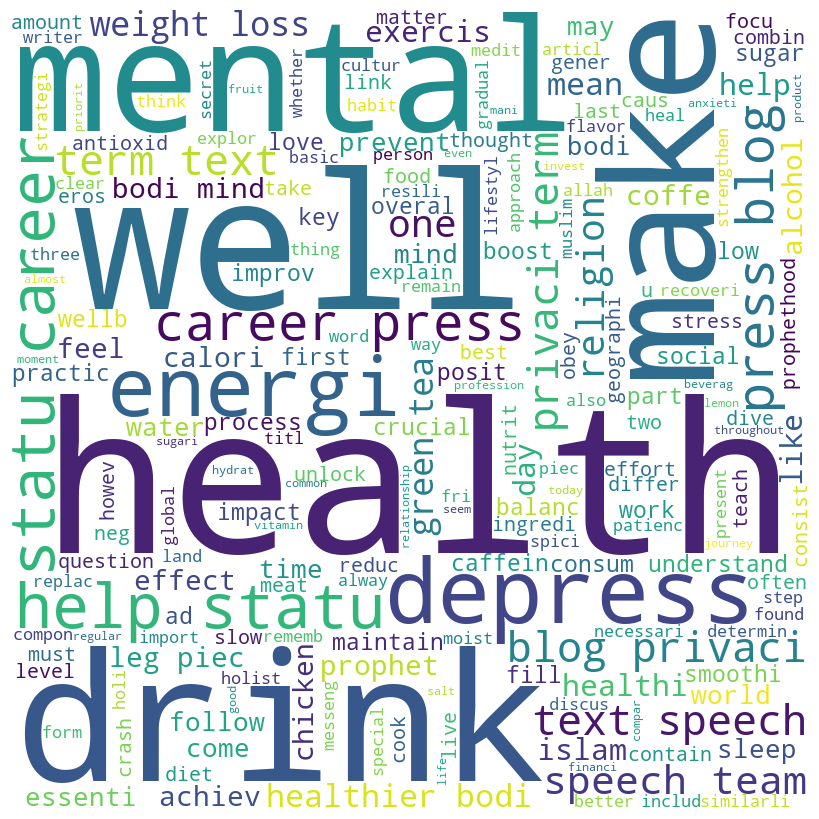

In [73]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [63]:
all_text = ' '.join([article['Text'] for article in all_articles])


In [74]:
freq_dict = {}
for word in all_text.split():
    if word in freq_dict:
        freq_dict[word] += 1
    else:
        freq_dict[word] = 1

print(freq_dict)

{'unlock': 3, 'secret': 2, 'healthier': 9, 'bodi': 19, 'welcom': 1, 'guid': 1, 'achiev': 6, 'mind': 11, 'key': 4, 'overal': 4, 'well': 18, 'explor': 2, 'nutrit': 3, 'exercis': 7, 'sleep': 5, 'help': 17, 'goal': 1, 'offer': 1, 'holist': 2, 'approach': 2, 'focu': 1, 'healthi': 7, 'dive': 3, 'compon': 2, 'lifestyl': 2, 'includ': 2, 'import': 2, 'impact': 4, 'health': 22, 'understand': 4, 'first': 4, 'step': 2, 'physic': 1, 'also': 2, 'mental': 12, 'introduct': 1, 'crucial': 4, 'part': 4, 'live': 3, 'play': 1, 'signific': 1, 'role': 1, 'maintain': 4, 'focus': 2, 'improv': 4, 'takeaway': 1, 'essenti': 5, 'necessari': 2, 'toward': 1, 'hi': 1, 'romesh': 1, 'im': 1, 'best': 3, 'articl': 2, 'writer': 2, 'statu': 11, 'career': 10, 'press': 10, 'blog': 10, 'privaci': 10, 'term': 10, 'text': 11, 'speech': 10, 'team': 10, 'world': 5, 'day': 7, 'found': 2, 'feder': 1, 'wfmh': 1, 'led': 1, 'deputi': 1, 'secretari': 1, 'gener': 3, 'richard': 1, 'hunter': 1, 'mission': 1, 'make': 12, 'global': 2, 'prio

In [76]:
print(len(freq_dict))

652


In [75]:
print(len(all_text))

8669


In [82]:
words = nltk.word_tokenize(all_text)
print(len(words))
print(words)
sentences = nltk.sent_tokenize(all_text)
print(len(sentences))
print(sentences)

1320
['unlock', 'secret', 'healthier', 'bodi', 'welcom', 'guid', 'achiev', 'healthier', 'bodi', 'mind', 'healthier', 'bodi', 'key', 'overal', 'well', 'well', 'explor', 'nutrit', 'exercis', 'sleep', 'help', 'unlock', 'secret', 'goal', 'offer', 'holist', 'approach', 'well', 'focu', 'healthi', 'bodi', 'well', 'well', 'dive', 'key', 'compon', 'healthi', 'lifestyl', 'includ', 'import', 'well', 'impact', 'health', 'understand', 'well', 'impact', 'health', 'first', 'step', 'healthier', 'bodi', 'physic', 'health', 'also', 'mental', 'well', 'overal', 'well', 'introduct', 'well', 'well', 'crucial', 'part', 'live', 'play', 'signific', 'role', 'maintain', 'healthi', 'bodi', 'focus', 'well', 'improv', 'overal', 'health', 'achiev', 'healthier', 'bodi', 'mind', 'key', 'takeaway', 'well', 'essenti', 'healthier', 'bodi', 'mind', 'healthi', 'bodi', 'key', 'overal', 'well', 'nutrit', 'exercis', 'sleep', 'crucial', 'compon', 'well', 'holist', 'approach', 'well', 'necessari', 'achiev', 'healthier', 'bodi',

In [79]:
{k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse = True)}

{'health': 22,
 'bodi': 19,
 'well': 18,
 'help': 17,
 'drink': 16,
 'mental': 12,
 'make': 12,
 'depress': 12,
 'mind': 11,
 'statu': 11,
 'text': 11,
 'career': 10,
 'press': 10,
 'blog': 10,
 'privaci': 10,
 'term': 10,
 'speech': 10,
 'team': 10,
 'energi': 10,
 'healthier': 9,
 'one': 9,
 'religion': 9,
 'weight': 9,
 'loss': 9,
 'green': 9,
 'tea': 9,
 'mean': 8,
 'piec': 8,
 'exercis': 7,
 'healthi': 7,
 'day': 7,
 'like': 7,
 'islam': 7,
 'leg': 7,
 'achiev': 6,
 'feel': 6,
 'prophet': 6,
 'chicken': 6,
 'effect': 6,
 'coffe': 6,
 'calori': 6,
 'alcohol': 6,
 'sleep': 5,
 'essenti': 5,
 'world': 5,
 'time': 5,
 'prevent': 5,
 'come': 5,
 'follow': 5,
 'water': 5,
 'may': 5,
 'key': 4,
 'overal': 4,
 'impact': 4,
 'understand': 4,
 'first': 4,
 'crucial': 4,
 'part': 4,
 'maintain': 4,
 'improv': 4,
 'low': 4,
 'fill': 4,
 'posit': 4,
 'process': 4,
 'practic': 4,
 'wellb': 4,
 'consum': 4,
 'ad': 4,
 'love': 4,
 'work': 4,
 'boost': 4,
 'balanc': 4,
 'smoothi': 4,
 'caffein': 4

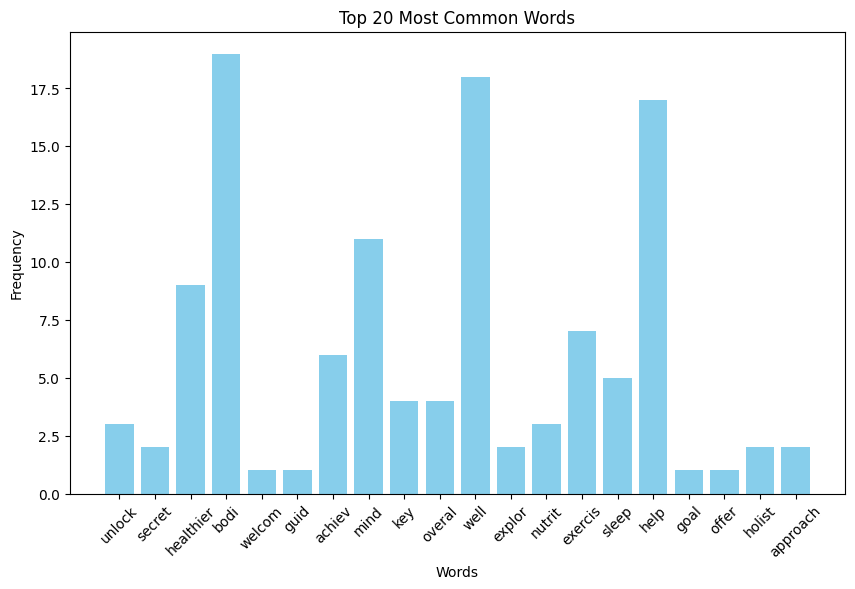

5.568181818181818
652
0.49393939393939396


In [83]:
plt.figure(figsize=(10, 6))
top_words, top_counts = zip(*freq_dict.items())
plt.bar(top_words[:20], top_counts[:20], color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

average_word_length = sum(len(word) for word in words) / len(words)
unique_words = len(set(words))
lexical_diversity = unique_words / len(words)

print(average_word_length)
print(unique_words)
print(lexical_diversity)

Still need to fix sentence tokenization

GPT

[('health', 1), ('bodi', 1), ('well', 1), ('help', 1), ('drink', 1), ('mental', 1), ('make', 1), ('depress', 1), ('mind', 1), ('statu', 1), ('text', 1), ('career', 1), ('press', 1), ('blog', 1), ('privaci', 1), ('term', 1), ('speech', 1), ('team', 1), ('energi', 1), ('healthier', 1)]


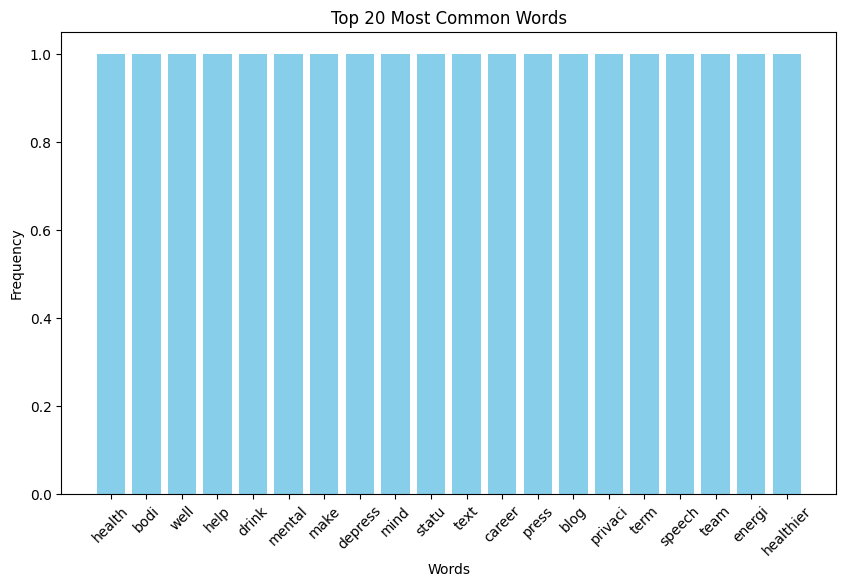

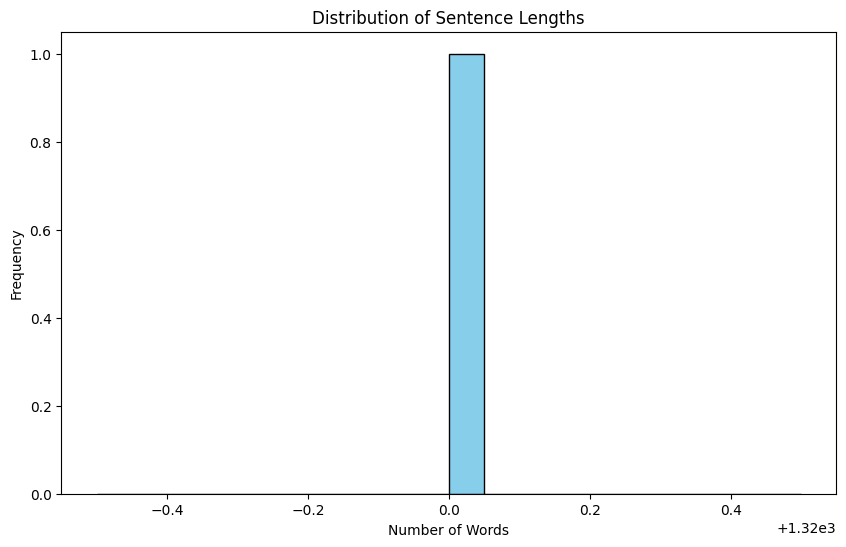

Average Word Length: 5.20
Number of Unique Words: 20
Lexical Diversity: 1.00


In [62]:
from nltk.probability import FreqDist
word_freq = FreqDist(words)


most_common_words = word_freq.most_common(20)

print(most_common_words)

plt.figure(figsize=(10, 6))
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


average_word_length = sum(len(word) for word in words) / len(words)
unique_words = len(set(words))
lexical_diversity = unique_words / len(words)


print(f"Average Word Length: {average_word_length:.2f}")
print(f"Number of Unique Words: {unique_words}")
print(f"Lexical Diversity: {lexical_diversity:.2f}")


